INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2598.png"...
INFO:colour_hdri.exif:Reading '/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2598.png' file exif data.
INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2599.png"...
INFO:colour_hdri.exif:Reading '/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2599.png' file exif data.
INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2600.png"...
INFO:colour_hdri.exif:Reading '/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2600.png' file exif data.
INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/examples/resources/IMG_2601.pn

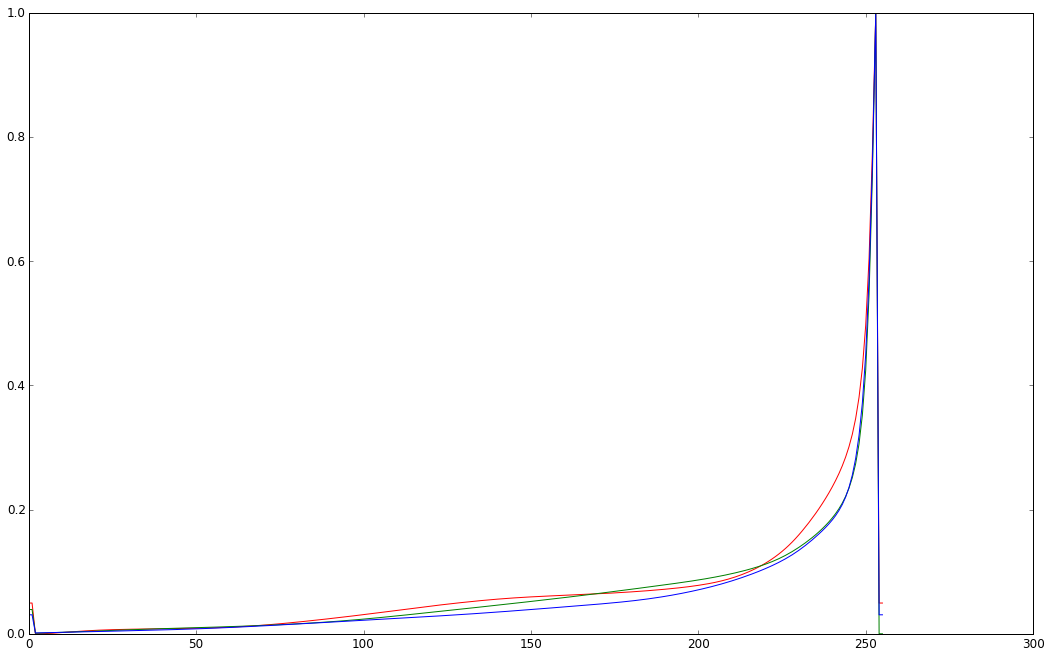

In [1]:
%matplotlib inline

import glob
import logging
import numpy as np
import os
import pylab
from fractions import Fraction

import colour
from colour.plotting import *

from colour_hdri.camera_response_functions import (
    camera_response_function_Debevec1997)
from colour_hdri.exif import get_exif_data
from colour_hdri.image import Image, ImageStack, Metadata

LOGGER = logging.getLogger()
LOGGER.setLevel(logging.DEBUG)

RESOURCES_DIRECTORY = os.path.join(os.getcwd(), 'resources')
PNG_FILES = glob.glob('{0}/*.png'.format(RESOURCES_DIRECTORY))


def examples_camera_response_functions(png_files):
    images_stack = ImageStack()
    for png_file in png_files:
        LOGGER.info('Reading "{}"...'.format(png_file))
        exif_data = get_exif_data(png_file)
        f_number = float(exif_data['EXIF']['F Number'][0])
        exposure_time = float(Fraction(
            exif_data['EXIF']['Exposure Time'][0]))
        iso = float(exif_data['EXIF']['ISO'][0])

        images_stack.append(Image(png_file,
                                  colour.read_image(png_file),
                                  Metadata(f_number, exposure_time, iso)))

    RGB_f = camera_response_function_Debevec1997(images_stack)
    RGB_f[np.isinf(RGB_f)] = 1
    RGB_f /= np.max(RGB_f, axis=0)

    pylab.plot(RGB_f)
    pylab.show()


examples_camera_response_functions(PNG_FILES)